# Comparative Analysis of Classical Machine Learning Algorithms and Artificial Neural Networks for Binary Intrusion Detection Using the NSL-KDD Dataset 

This project implements a Network Intrusion Detection System (NIDS) using the NSL-KDD dataset, which is well known in the cybersecurity domain for benchmarking. My primary goal is to perform binary classification, distinguishing between normal and attack in network traffic. I will explore and compare the effectiveness of different Machine Learning algorithms and an Artificial Neural Network (ANN) for this purpose. This notebook provides a hands-on guide covering essential steps from data preprocessing to model evaluation for AI/ML beginners.

1. Import Libraries
   - pip install numpy
   - pip install pandas
   - pip install matplotlib
   - pip install seaborn
   - pip install scikit-learn
   - pip install tensorflow
   - pip install wandb

2. Basic Import Tests

In [223]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    auc,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Precision, Recall
from wandb.integration.keras import WandbCallback
import wandb
from wandb.integration.keras import WandbMetricsLogger
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

3. Data Acquisition & Loading 

In [224]:
# train dataset
df_train_0 = pd.read_csv('datasets/KDDTrain+.txt')
df_train = df_train_0.copy()
df_train.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [225]:
print(df_train.columns)

Index(['0', 'tcp', 'ftp_data', 'SF', '491', '0.1', '0.2', '0.3', '0.4', '0.5',
       '0.6', '0.7', '0.8', '0.9', '0.10', '0.11', '0.12', '0.13', '0.14',
       '0.15', '0.16', '0.18', '2', '2.1', '0.00', '0.00.1', '0.00.2',
       '0.00.3', '1.00', '0.00.4', '0.00.5', '150', '25', '0.17', '0.03',
       '0.17.1', '0.00.6', '0.00.7', '0.00.8', '0.05', '0.00.9', 'normal',
       '20'],
      dtype='object')


3.1. Adjust Header
 - As you can see the data has no features names. Therefore i adjust the columns based from the link: https://  www.kaggle.com/code/timgoodfellow/nsl-kdd-explorations

In [226]:
# add the column labels
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df_train.columns = columns
# Display the first 5 rows to understand the data format
print("\nFirst 5 rows of the dataset:")
df_train.head()


First 5 rows of the dataset:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [227]:
# Load test dataset and add columns too
df_test_0 = pd.read_csv('datasets/KDDTest+.txt')
df_test = df_test_0.copy()
df_test.columns = columns
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


4. Data Exploratory and Analysis

In [228]:
# Display the shape of the dataframe (rows, columns)
print(f"Dataset Shape: {df_train.shape}")


Dataset Shape: (125972, 43)


4.1. Data Types and Null Values
 - check the data types of all columns and see if  there are any missing values

In [229]:
print("Dataframe Info:")
df_train.info()

# Check for the sum of null values in each column
print("\nSum of null values in each column:")
print(df_train.isnull().sum().sum())

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-nu

- The Dataset contains 125.972 records with 43 columns.
- In the Dataset there are 3 columns with the **object** datatype (protocol_type, service and flag).
- The rest are numercial divded into **int64** and **float64**.
- We also have **zero null values** in the dataset. This means i don't need to perform some sort of imputation (eplacing missing data in a datase).


4.2 Data Cleaning
 - In addition to handling null values, I also make sure to keep an eye out for duplicates. 
 - It has been mentioned in numerous papers that the predecessor KDD'99 dataset contained a high number of duplicates, which can bias a machine learning model.

In [230]:
# Check for duplicate rows
duplicate_count = df_train.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


4.3 Target Variable Analysis
 - My goal in this project is binary classification—determining whether a connection is either 'normal' or 'attack'. Since the current attack column is multi-attack, I need to engineer a binary target variable and then analyze its distribution.

Training data attack distribution:
attack
normal             67342
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64


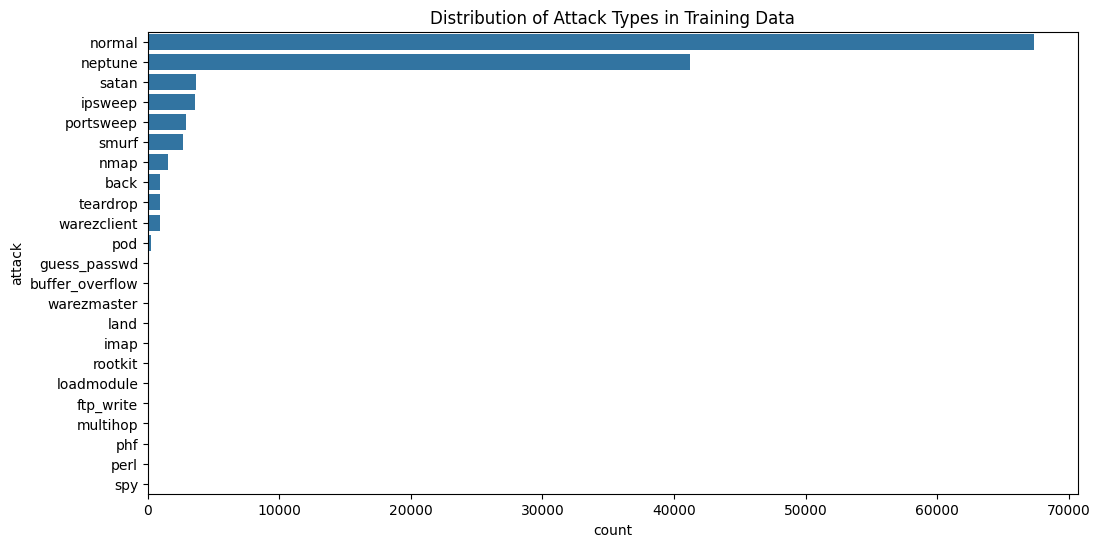

In [231]:
# Check the distribution of the 'attack' column
print("Training data attack distribution:")
print(df_train["attack"].value_counts())

# Visualize the distribution
plt.figure(figsize=(12, 6))
sns.countplot(y="attack", data=df_train, order=df_train["attack"].value_counts().index)
plt.title("Distribution of Attack Types in Training Data")
plt.show()

In [232]:
# Examine unique values in the 'attack' column
print("Unique values in the 'attack' column:")
print(df_train["attack"].unique())
print(f"\nNumber of unique attacks: {df_train['attack'].nunique()}")

# Create binary target variable 'is_attack'
# 1 if the is not 'normal', 0 if it is 'normal'
df_train["is_attack"] = df_train["attack"].apply(
    lambda x: 0 if x == "normal" else 1
)

print("\n'is_attack' column created")

# Drop the original multi-class 'class' and 'difficulty' columns
df_train = df_train.drop(columns=['attack', 'level'])

df_train.head(5)

Unique values in the 'attack' column:
['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land'
 'loadmodule' 'spy' 'perl']

Number of unique attacks: 23

'is_attack' column created


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,is_attack
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,1


In [233]:
# Same for Test
df_test["is_attack"] = df_test["attack"].apply(
    lambda x: 0 if x == "normal" else 1
)

print("\n'is_attack' column created")

# Drop the original multi-class 'class' and 'difficulty' columns
df_test = df_test.drop(columns=['attack', 'level'])
df_test.head()


'is_attack' column created


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,is_attack
0,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,0
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,1
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,1
4,0,tcp,http,SF,267,14515,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,0


4.4 Class Distributation
 - Goal to visualize the distribution of the new binary target.

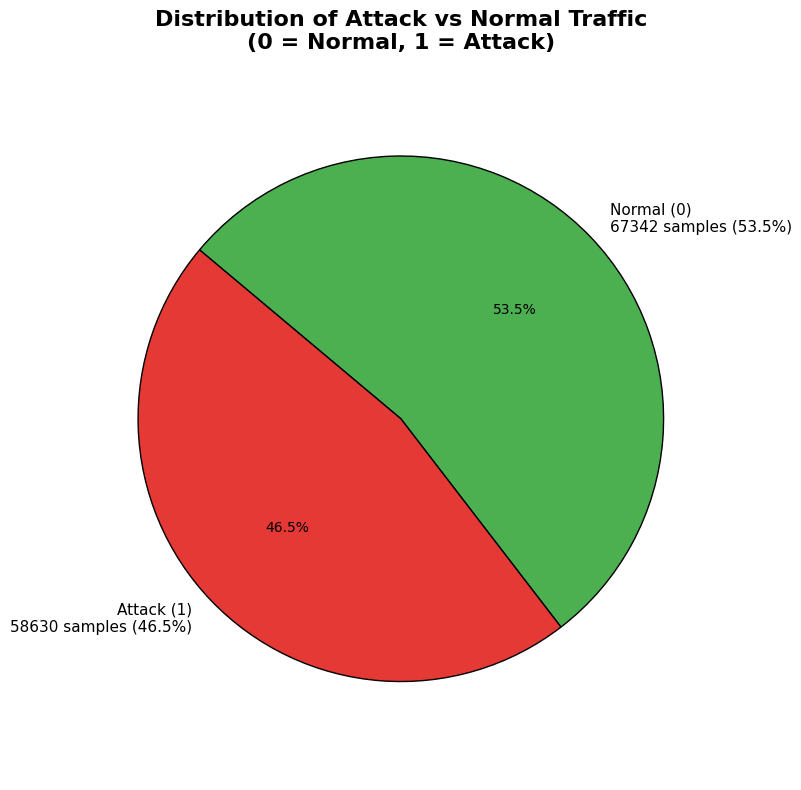

In [234]:
# the 2 most frequent classes in the column ‘is_attack’
top_classes = df_train["is_attack"].value_counts().nlargest(5)

class_map = {0: "Normal", 1: "Attack"}
# Labels with meaning, count, and percentage
labels = [
    f"{class_map.get(label, label)} ({label})\n{count} samples ({count / top_classes.sum():.1%})"
    for label, count in top_classes.items()
]

# Colors for classes: green for normal, red for attack, grays for others
colors = ["#4CAF50", "#E53935", "#9E9E9E", "#BDBDBD", "#E0E0E0"]

# Create pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    top_classes,
    labels=labels,
    autopct="%1.1f%%",
    startangle=140,
    counterclock=False,
    wedgeprops={"edgecolor": "k"},
    colors=colors
)

# Style text
for text in texts:
    text.set_fontsize(11)
for autotext in autotexts:
    autotext.set_fontsize(10)

# Headline
plt.title("Distribution of Attack vs Normal Traffic\n(0 = Normal, 1 = Attack)", fontsize=16, fontweight="bold")
plt.axis("equal")
plt.tight_layout()
plt.show()

 - The dataset contains 67342 normal connections and 58630 attack connections. 
 - There is a small imbalance (approx. 53% Normal vs. 47% Attack),which is okay. 
  

4.5 Numercial Feature Analysis
 - analyze the the numerical features to understand their scale, central tendency, and spread.

In [235]:
# Get summary statistics for all numerical columns
print("Summary statistics for numerical features:")
df_train.describe()

Summary statistics for numerical features:


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,is_attack
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,0.465421
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,0.498805
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,1.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


 - **Interpretation**
   - **Scale**: What we can observe is, that some features for example **src_bytes** and **dst_bytes** can go into the millions, while in the other hand features like **dst_host_serror_rat** are between 0 and 1. This recognition makes technices like **feature scaling** (StandardScaler) a mandatory step.
   - **Zero Variance**: The feature **num_outbound_cmds** has a std of 0, meaning it it has the same value for all records. This feature is useless for prediction and should be removed from the dataset.
   - **Skewness**: A few features like **src_bytes** have a mean that is much larger than the median (50% percentile), and a max value that is extremely far from the 75th percentile. This indicates strong right-skewness and maybe presence of outliers. I will check this later.

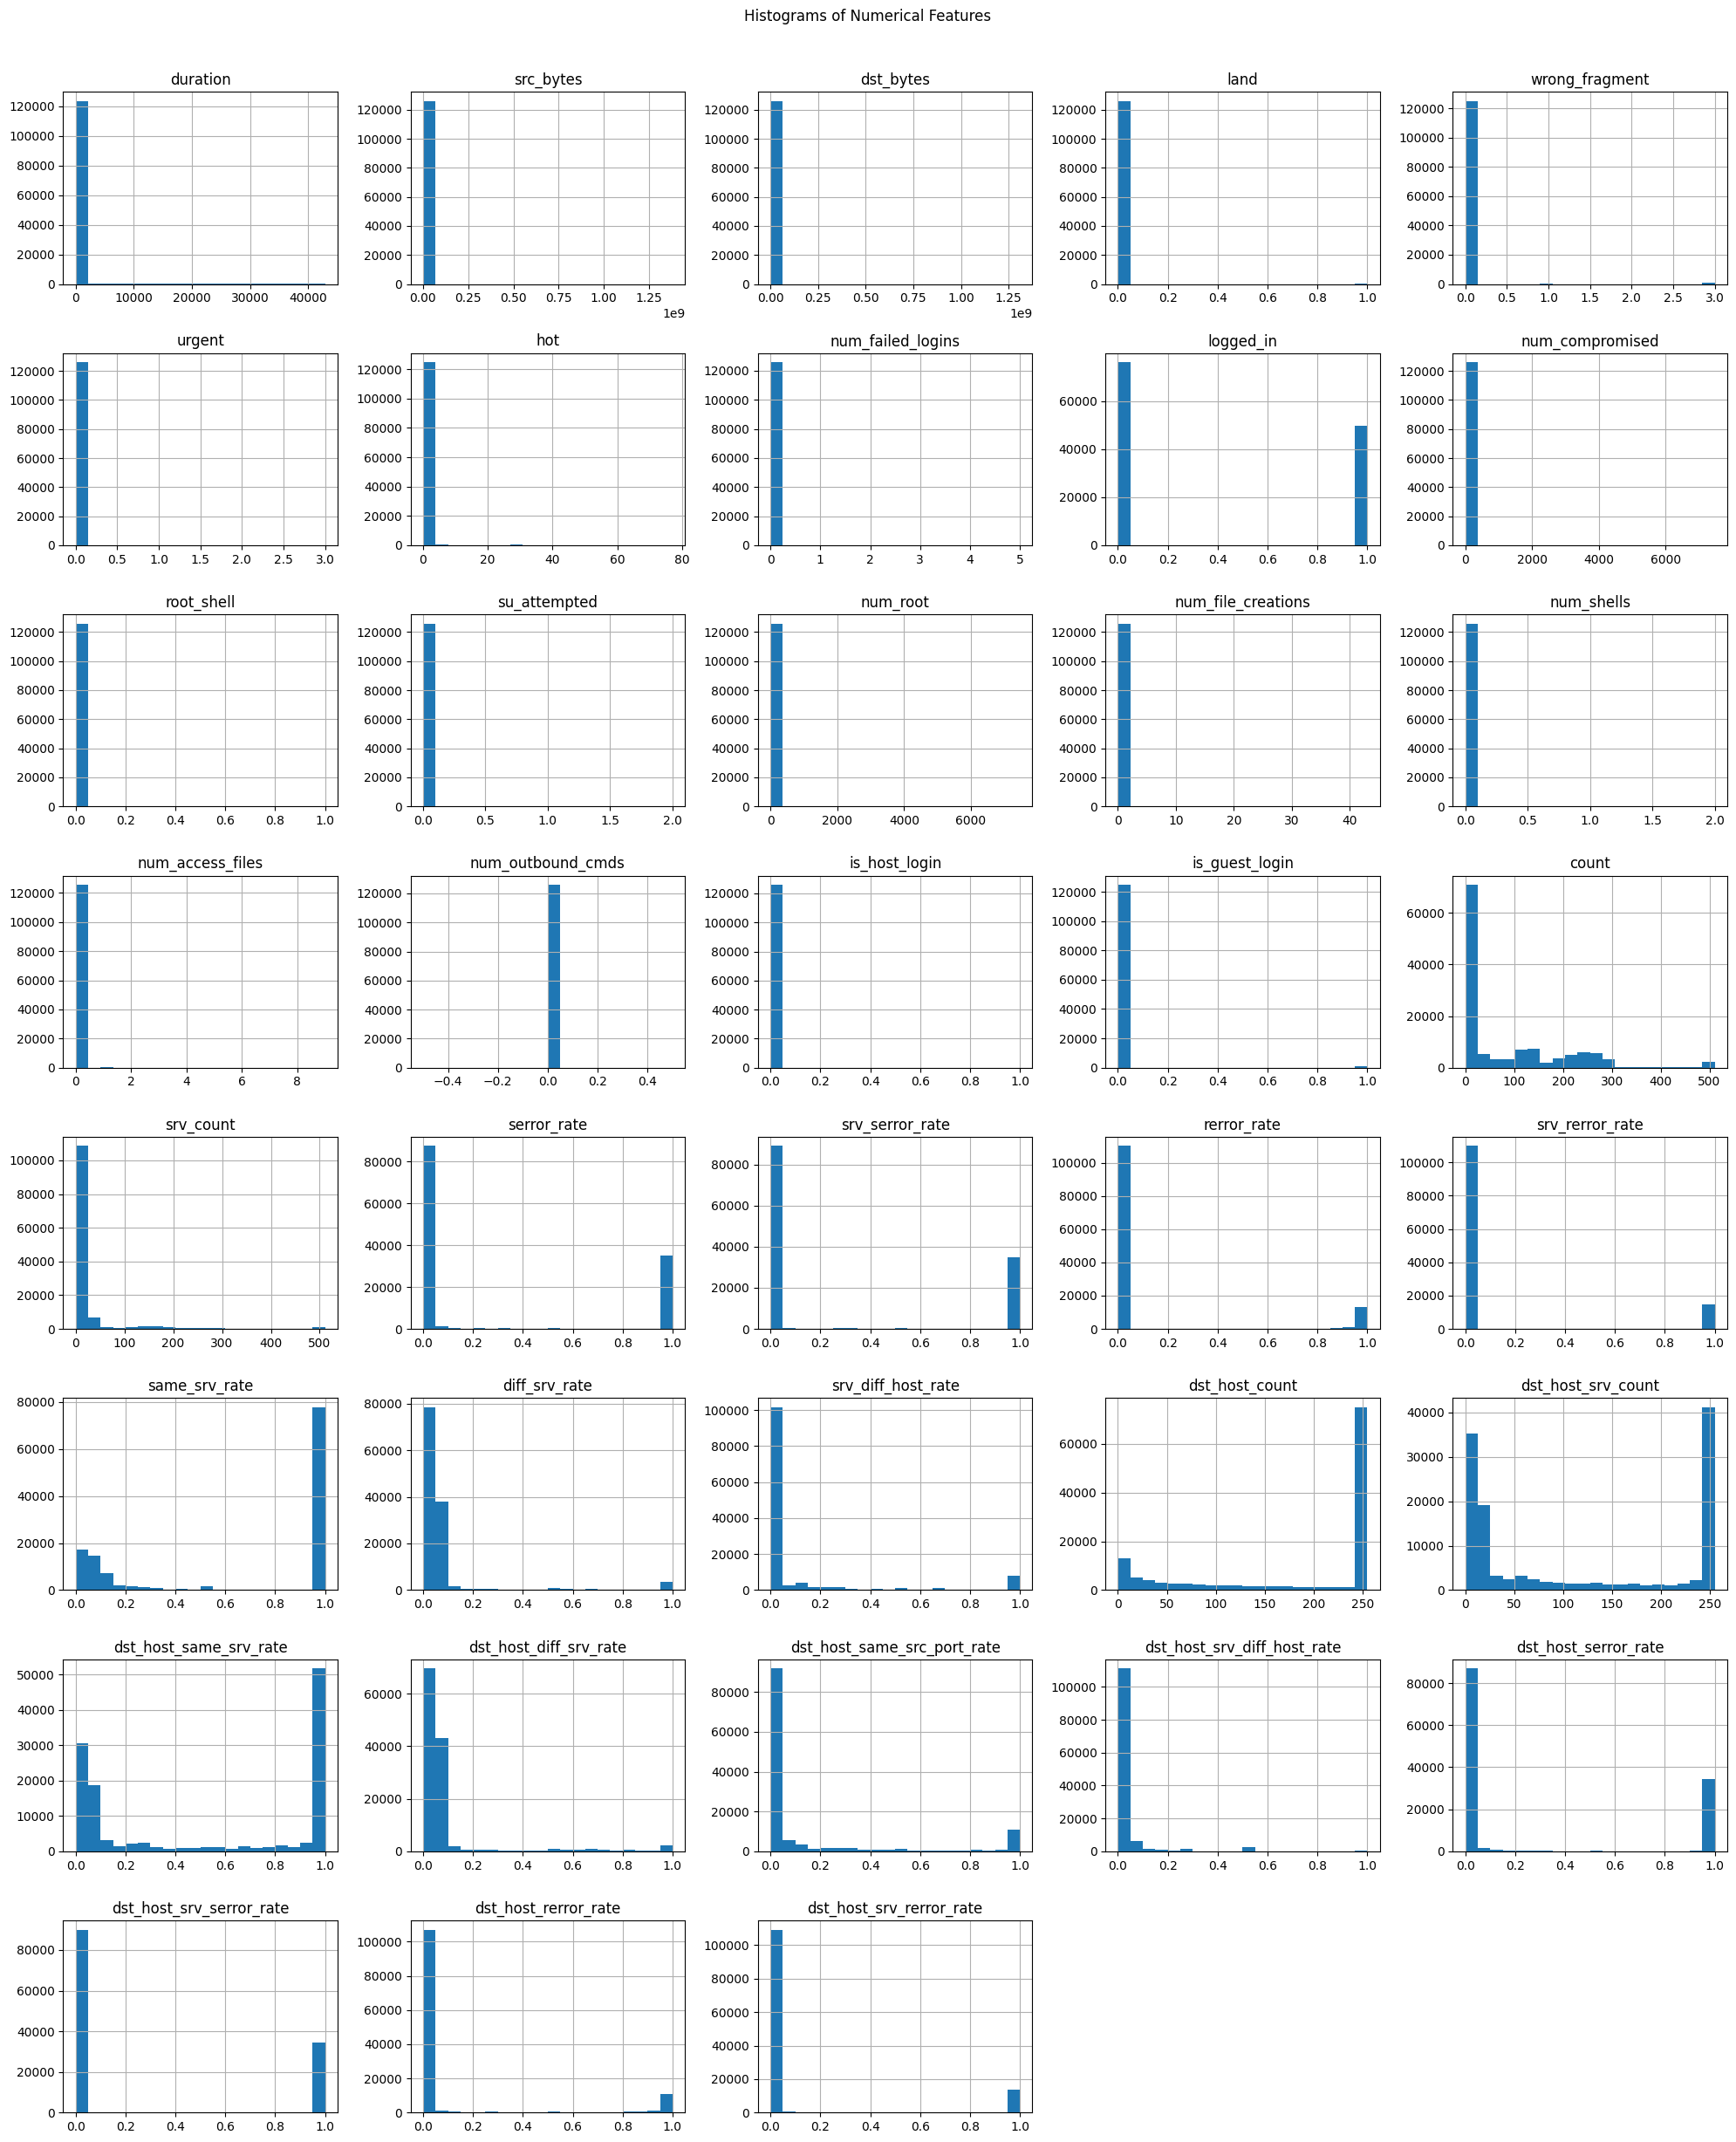

In [236]:
# Select only numerical columns for plotting
numerical_features = df_train.select_dtypes(
    include=np.number
).columns.tolist()
numerical_features.remove("is_attack") # Exclude the target variable

# Plot histograms for numerical features
df_train[numerical_features].hist(
    bins=20, figsize=(20, 25), layout=(8, 5)
)
plt.suptitle("Histograms of Numerical Features")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

### Key Findings from Histograms of Numerical Features

The histograms provide crucial insights into the distribution and characteristics of the numerical features in the NSL-KDD dataset. The primary observation across nearly all features is **extreme right-skewness**, with the majority of data points clustered around very low values, often zero.

**Meaning of the Axes:**

*   **X-axis (Horizontal Axis):** Represents the **value range (bins)** for the specific numerical feature. Each bar shows a specific interval of values for that feature.
*   **Y-axis (Vertical Axis):** Represents the **frequency (count)** of network connections falling within each value interval (bin) on the X-axis. A higher bar indicates more connections exhibiting values within that particular range.

  **Dominance of Low Values**
    *   Many Featurs show a massive concentration of connections at or near zero (most network connections are short-lived, transfer minimal data, and are part of sma
  
**Zero Variance Features:**
    *   The histogram for `num_outbound_cmds` clearly shows that all connections have a value of zero, indicating **zero variance**. This feature provides no predictive power and should be removed.

**Implications for Preprocessing and Modeling:**
    *   The vast differences in the scale of values across features (e.g., `src_bytes` in millions vs. `rerror_rate` between 0 and 1) highlight the **critical need for feature scaling** (e.g., `StandardScaler`) before applying many machine learning algorithms, especially those sensitive to feature magnitudes or based on distance calculations (like SVM, KNN, Neural Networks, Logistic Regression).

4.5.1 Outliers Analysis
 - as i mentioed before there are some indicators that outliers are present

<Figure size 2000x4000 with 0 Axes>

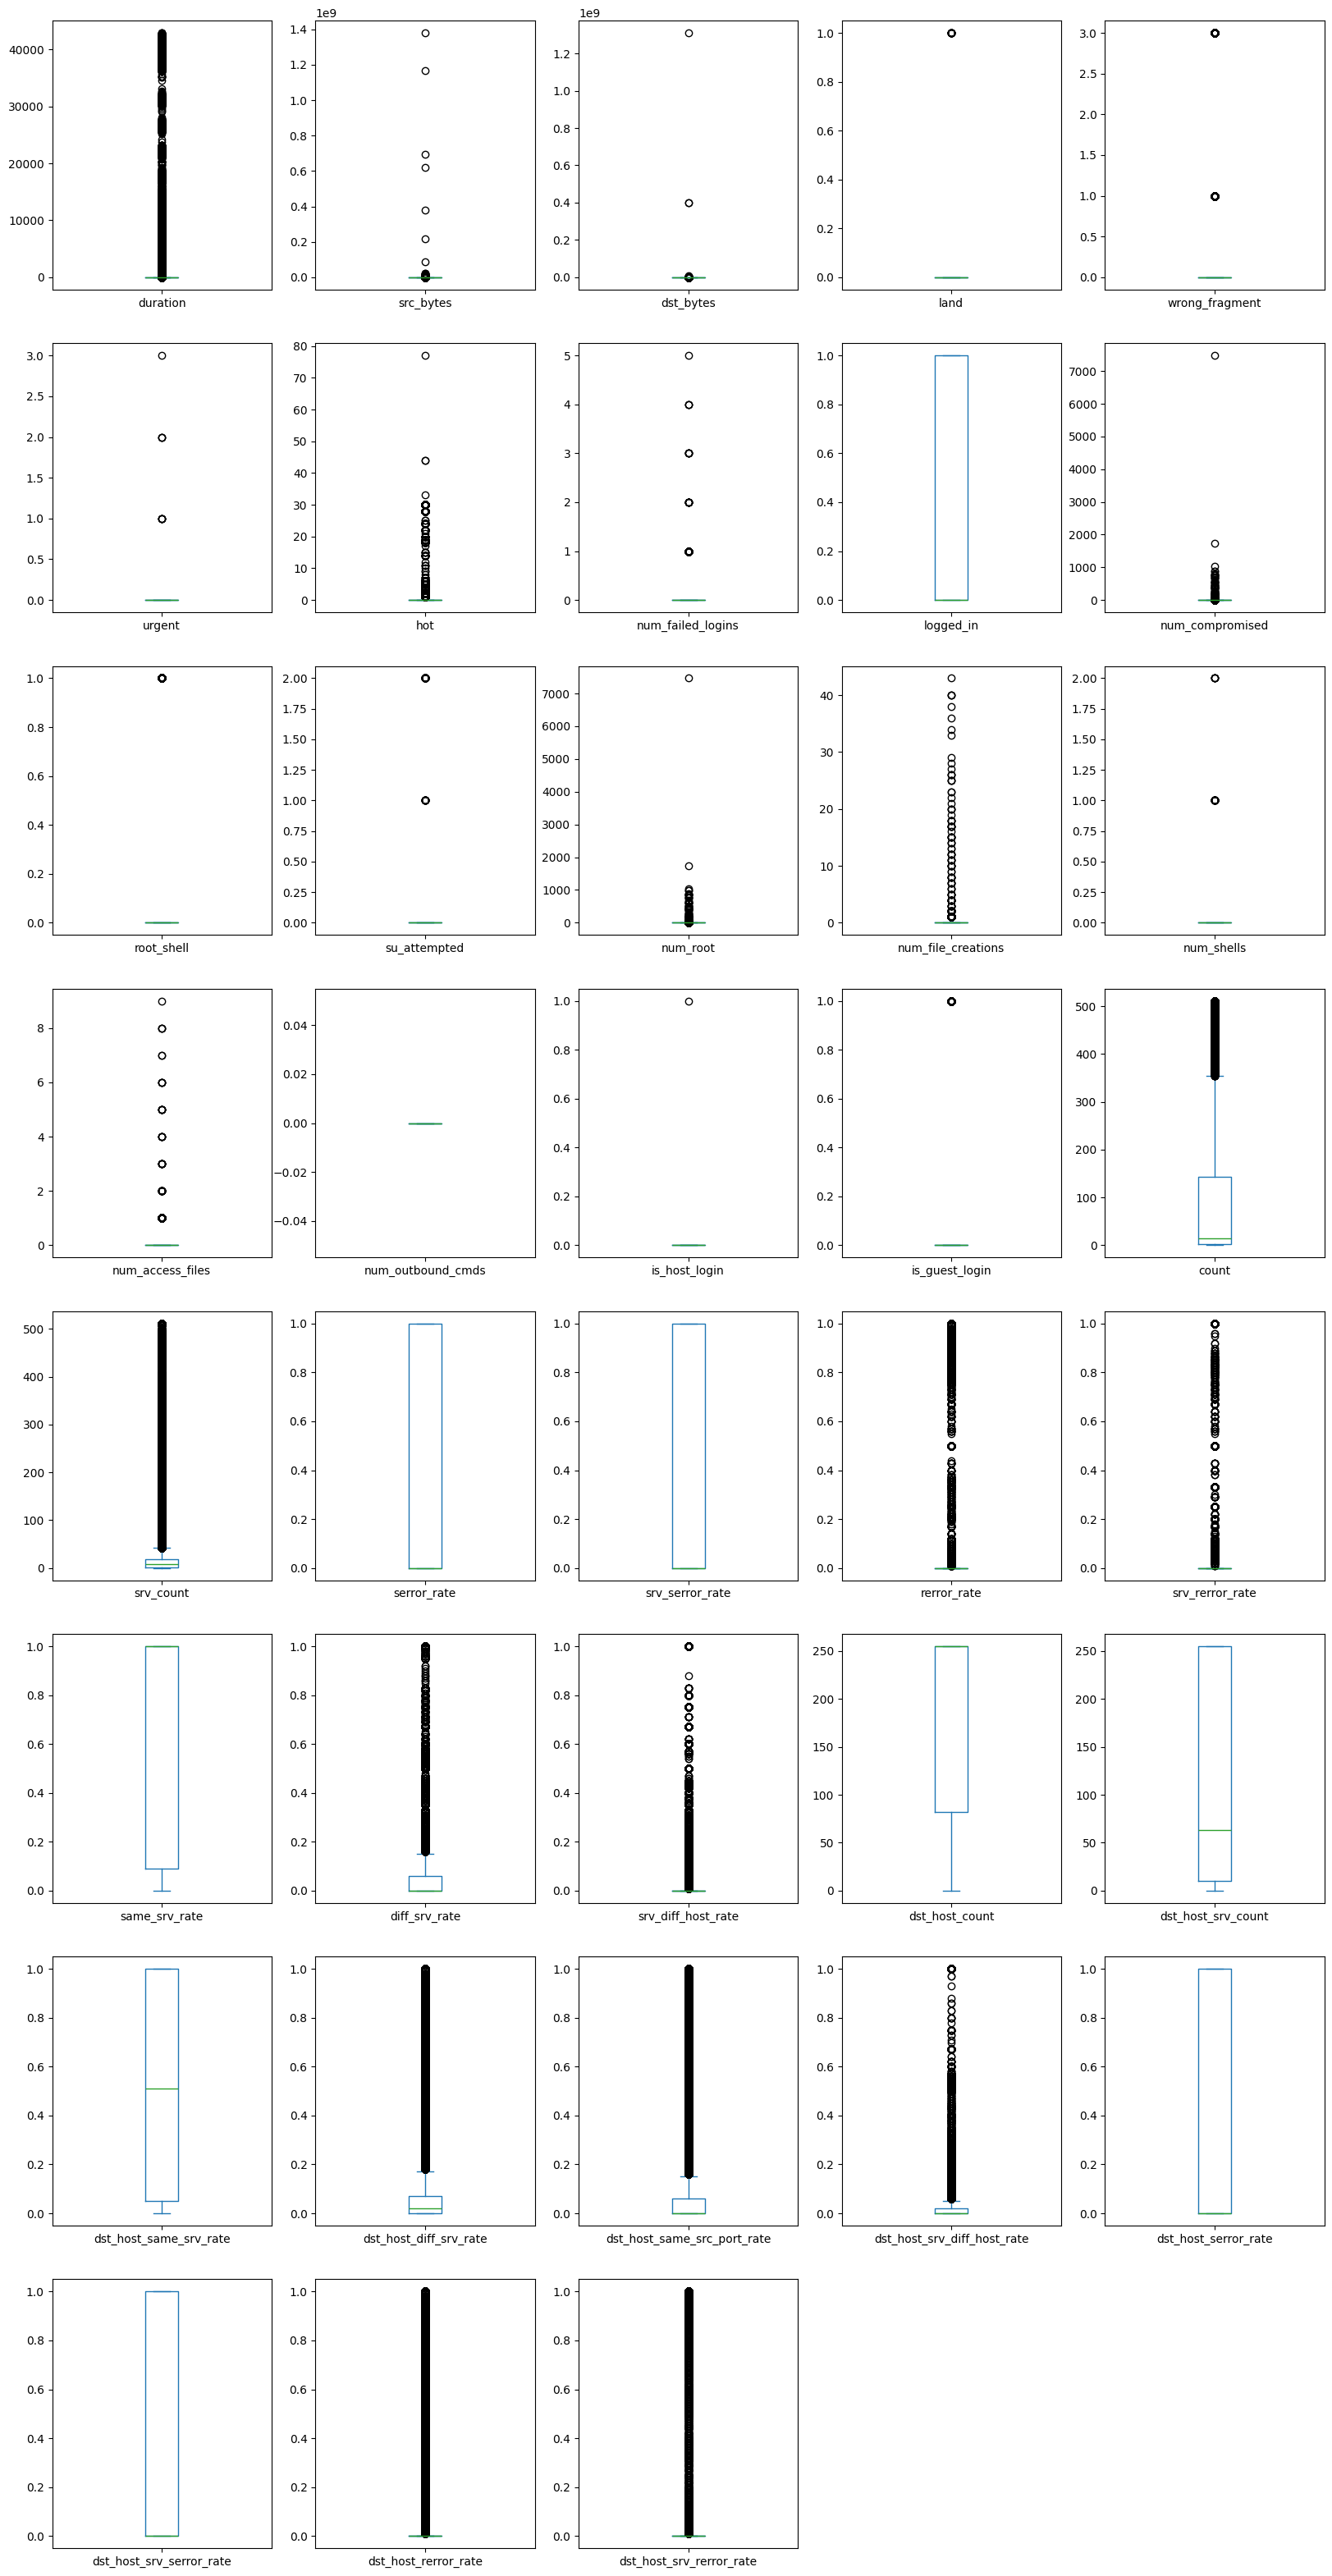

In [237]:
plt.figure(figsize=(20, 40))
df_train[numerical_features].plot(kind='box', subplots=True, layout=(8, 5), figsize=(20, 40))
plt.show()

- **Interpretation**
    -  significant number of **outliers** are observed across many features (like **duration**, **src_bytes**, **dst_bytes**, **count**, **srv_count**). This is typical for network security datasets, as anomalies or attacks often manifest as extreme values.

4.6. Categorial Features Analysis

C:\Users\marce\AppData\Local\Temp\ipykernel_46000\1055042333.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


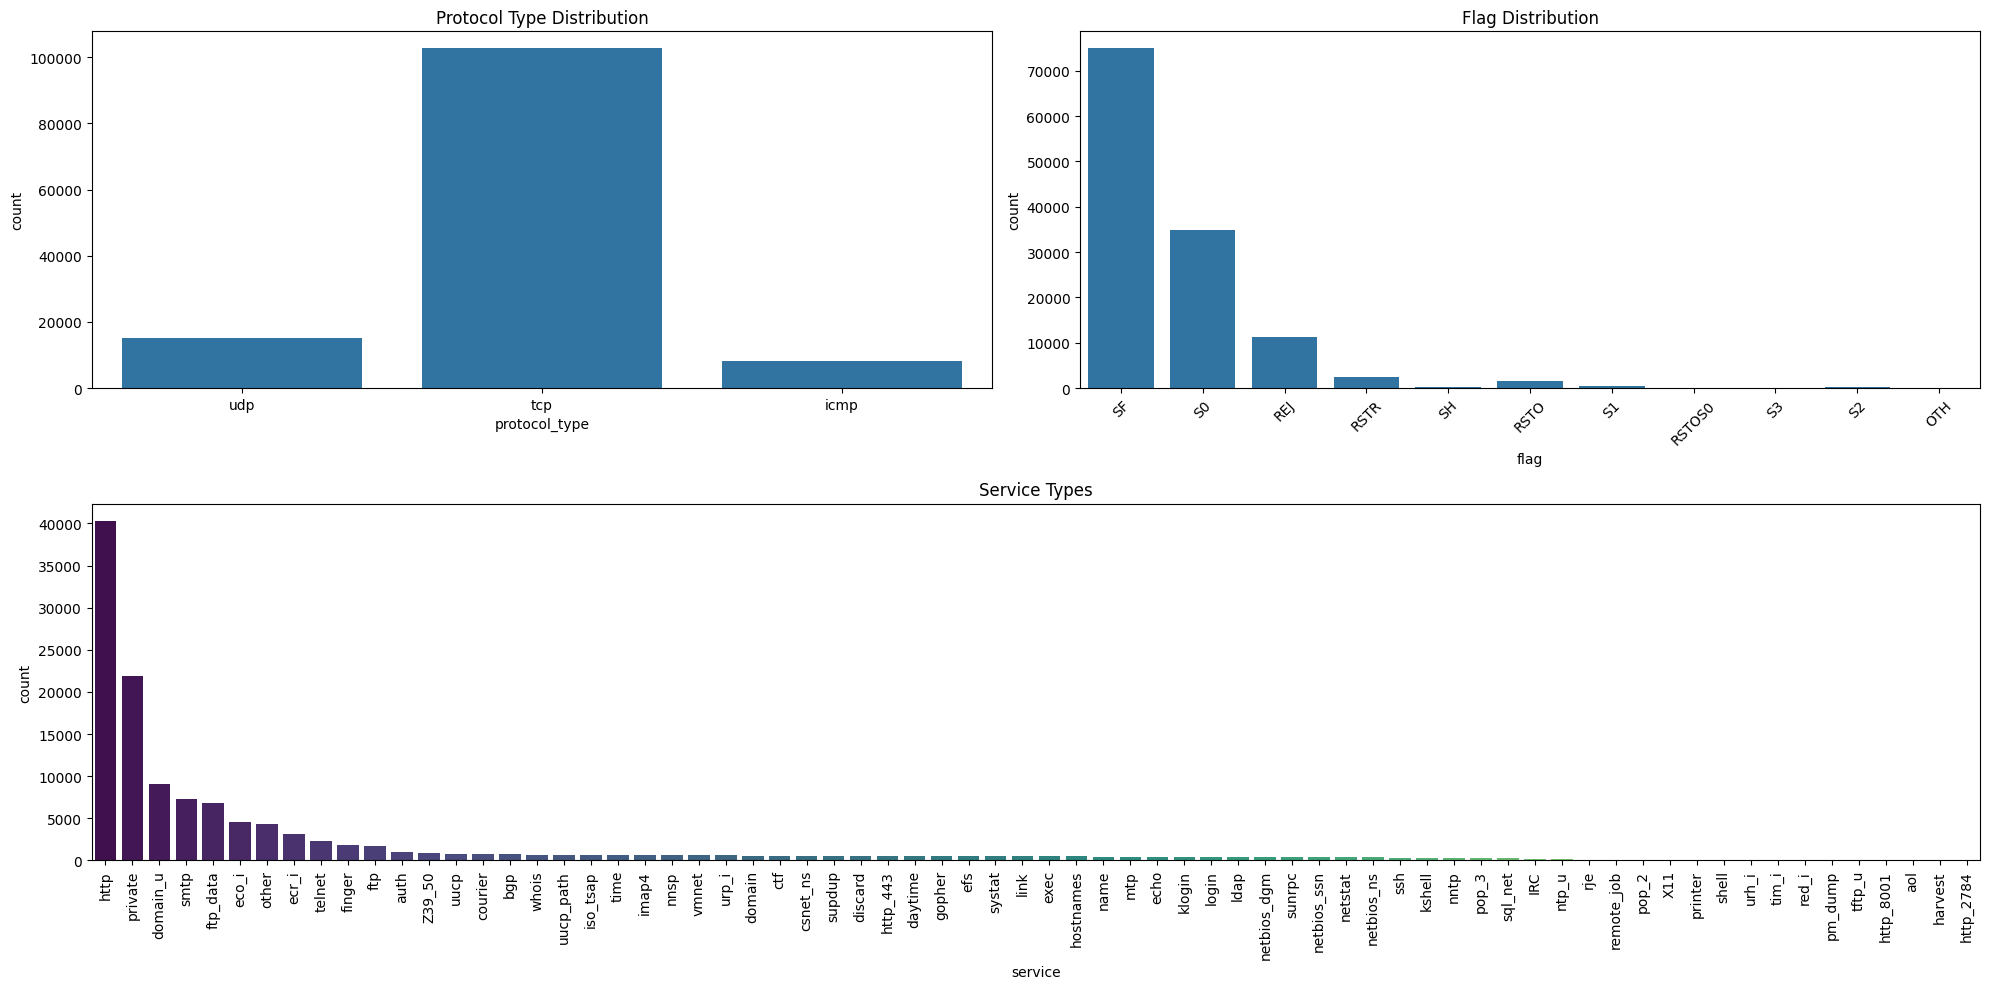

Number of unique service types: 70


In [238]:
# Identify categorical features
categorical_features = df_train.select_dtypes(include="object").columns

plt.figure(figsize=(20, 10))

# Plot for 'protocol_type'
plt.subplot(2, 2, 1)
sns.countplot(x="protocol_type", data=df_train)
plt.title("Protocol Type Distribution")

# Plot for 'flag'
plt.subplot(2, 2, 2)
sns.countplot(x="flag", data=df_train)
plt.title("Flag Distribution")
plt.xticks(rotation=45)

# Plot for 'service'
plt.subplot(2, 1, 2)  # das untere ganze Feld (mittig über beide Spalten)
top_services = df_train["service"].value_counts().index
sns.countplot(
    x="service",
    data=df_train,
    order=top_services,
    palette="viridis",
)
plt.title("Service Types")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

print(f"Number of unique service types: {df_train['service'].nunique()}")


- **Interpretation**
   - In the first diagramm **protocol_type** you can see, that **TCP** is the most used protocol, followed by **UDP** and **ICMP**
   - In the **Flag Distributation** Plot you can see the distributation of the status of the connection. 
  
        | Flag Code | Meaning                                               |
        |-----------|-------------------------------------------------------|
        | SF        | Successful connection                                 |
        | S0        | Connection attempt seen, no reply                     |
        | REJ       | Connection rejected                                   |
        | RSTR      | Connection reset                                      |
        | SH        | Connection established, then half-closed              |
        | RSTO      | Connection reset by receiver                          |
        | RSTOS0    | Connection reset without response                     |
        | S1        | Connection attempt, 1 packet received                 |
        | S2        | Connection attempt, 2 packets received                |
        | S3        | Connection attempt, 3 packets received                |
        | OTH       | Other TCP connection statuses                         |

  - In the **Service Types** Diagramm you can see all different services. There are 70 unique service types. **http** is the most common, followed by **private** and **domain_u**. The high cardinality of this feature means that One-Hot Encoding will create many new columns.


4.7. Numerical Feature Correlation
 - I want so see if how the numerical features relate to each other. Idea: if features are highly correalted, maybe we can reduce the number of features to reduce edundancy in the model.

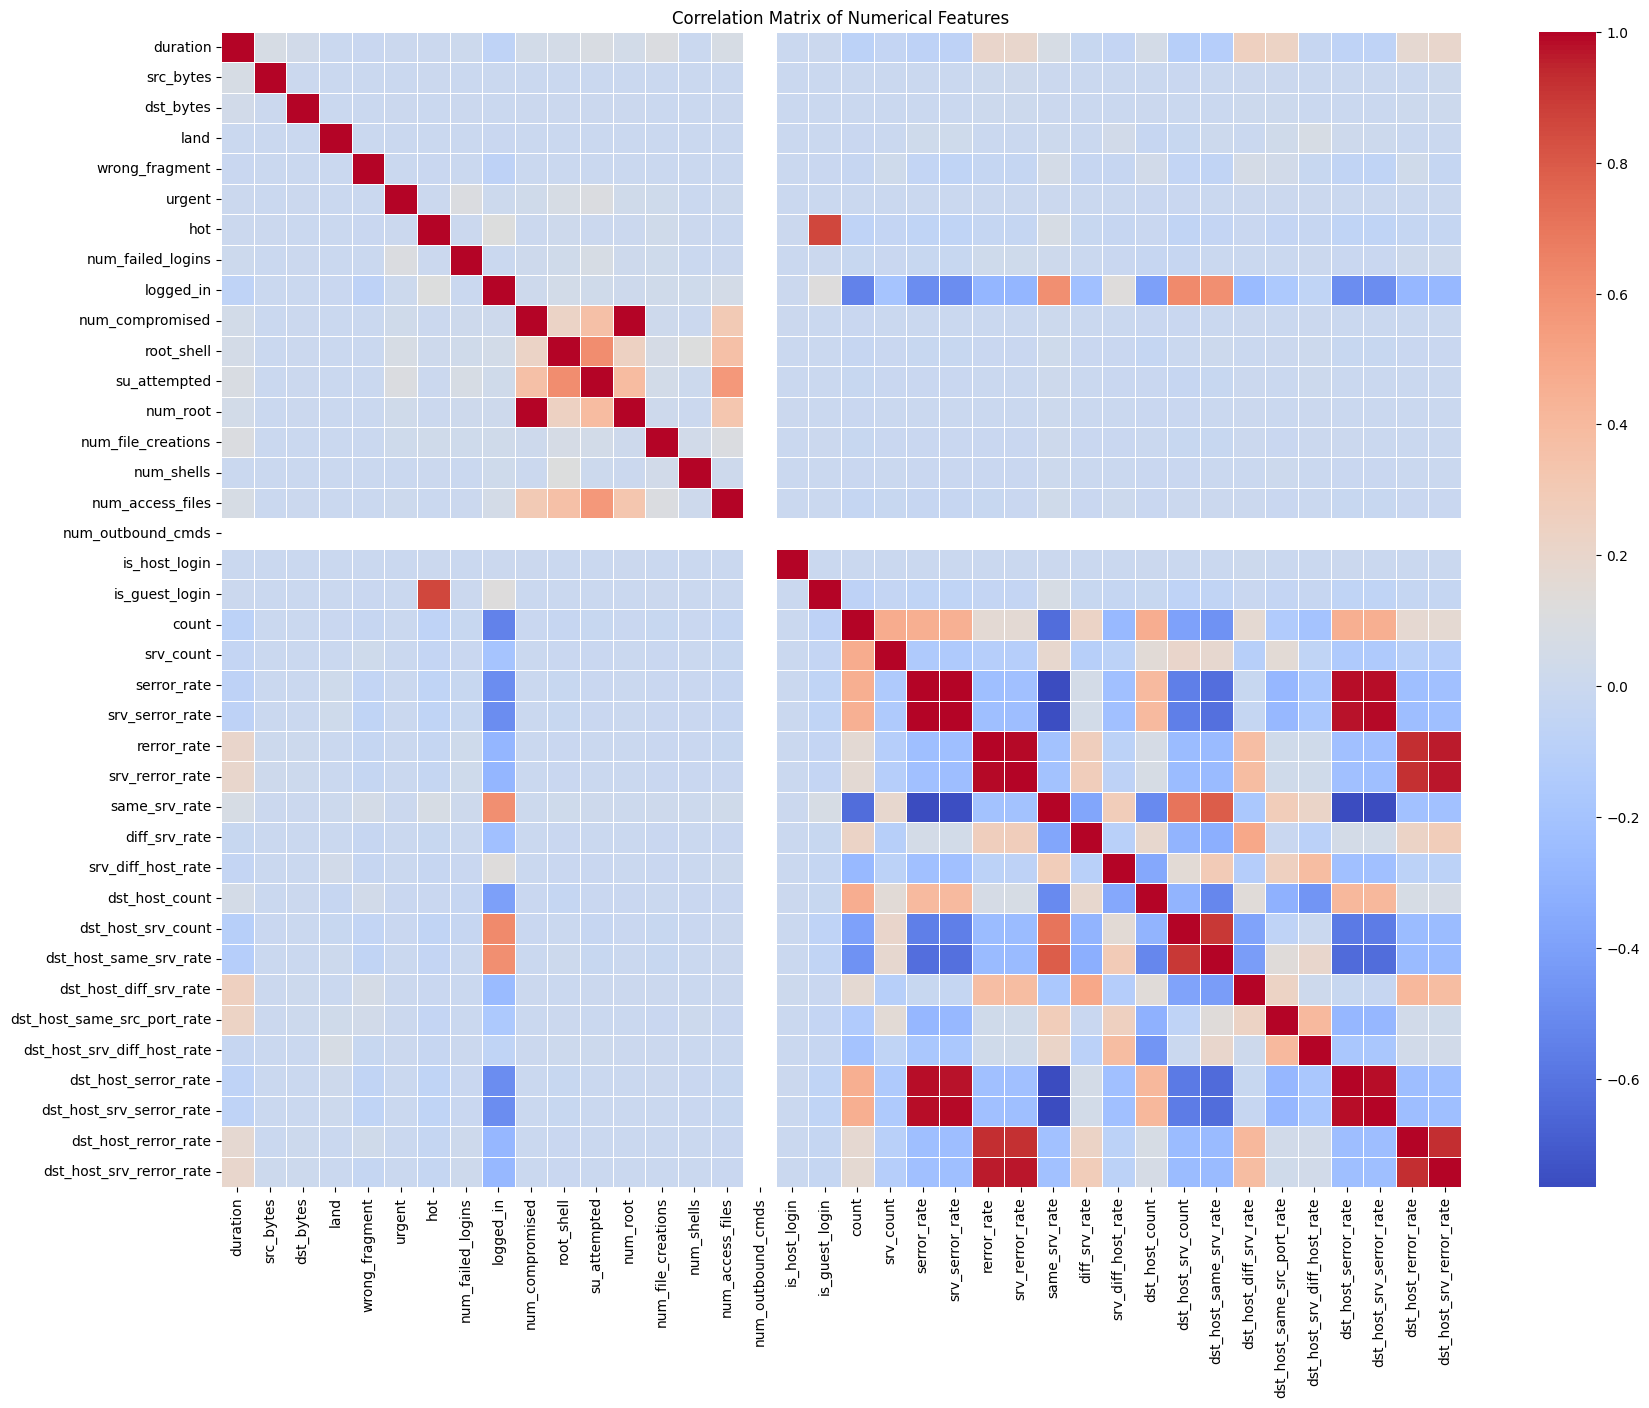

--- Correlation Coefficients for Identified Pairs ---
'serror_rate' and 'srv_serror_rate': 0.9933
'rerror_rate' and 'srv_rerror_rate': 0.9890
'dst_host_srv_count' and 'dst_host_same_srv_rate': 0.8967
'num_compromised' and 'num_root': 0.9988


In [239]:
#correlation matrix for numerical features
correlation_matrix = df_train[numerical_features].corr()

# Plot heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(
    correlation_matrix,
    annot=False,
    cmap="coolwarm",
    linewidths=0.5,
)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


# Extract the specific correlation values for the pairs you identified
corr_serror = correlation_matrix.loc["serror_rate", "srv_serror_rate"]
corr_rerror = correlation_matrix.loc["rerror_rate", "srv_rerror_rate"]
corr_dst_host = correlation_matrix.loc[
    "dst_host_srv_count", "dst_host_same_srv_rate"
]
corr_compromised = correlation_matrix.loc["num_compromised", "num_root"]

print("--- Correlation Coefficients for Identified Pairs ---")
print(
    f"'serror_rate' and 'srv_serror_rate': {corr_serror:.4f}"
)
print(
    f"'rerror_rate' and 'srv_rerror_rate': {corr_rerror:.4f}"
)
print(
    f"'dst_host_srv_count' and 'dst_host_same_srv_rate': {corr_dst_host:.4f}"
)
print(
    f"'num_compromised' and 'num_root': {corr_compromised:.4f}"
)


- **Conclusion**
   - **serror_rate** and **srv_serror_rate** are highly correlated.
   - **rerror_rate** and **srv_rerror_rate** are highly correlated.
   - **dst_host_srv_count** and **dst_host_same_srv_rate** are highly correlated.
   - **num_compromised** and **num_root** are highly correlated.



- **Summary Data Exploratory and Analysis**
    - The Dataset has no missing values
    - The Dataset has no null values
    - The Dataset has no duplicates in the Data
    - There is a small imbalance in the classes (attack vs. normal)
    - There are three columns with object datatypes (protocol_type, service and flag) 
    - Next Steps:  
        - Apply **One-Hot Endocing** for the categorical columns
        - Implementation of **StandardScaler** to reduce the scale
        - Remove the column **num_outbound_cmds** from the dataset (zero variance)
        - (Further deep dive into high correlated columns --> optional)


- Other Diagramms

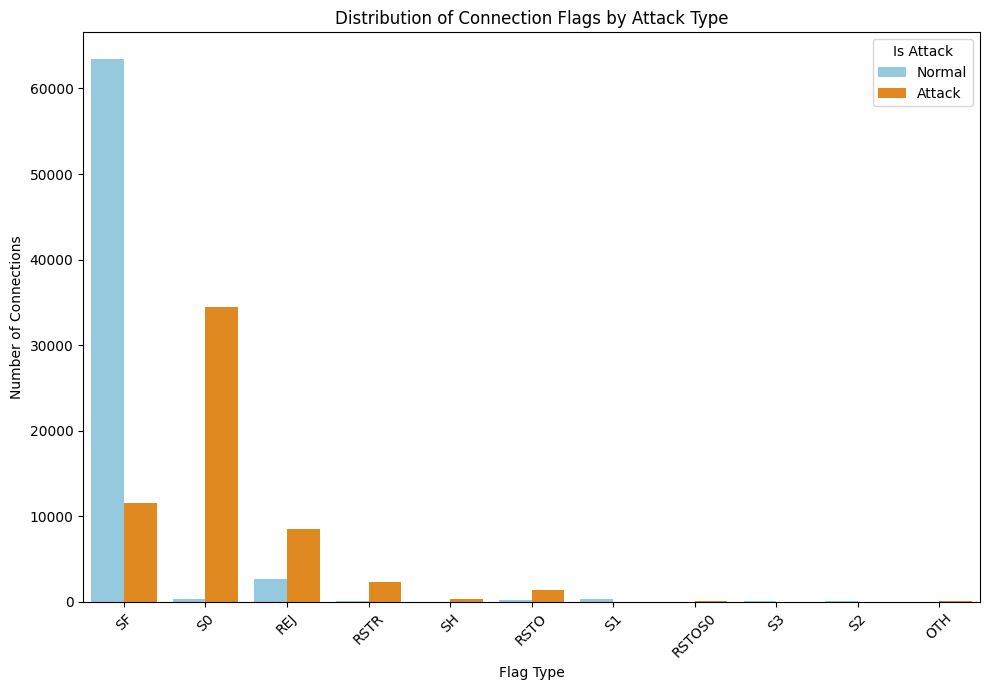

In [240]:
# Compare normal vs attack with flags
attack_palette = {0: 'skyblue', 1: 'darkorange'}

plt.figure(figsize=(10, 7))
sns.countplot(x="flag", hue="is_attack", data=df_train, palette=attack_palette)
plt.title("Distribution of Connection Flags by Attack Type")
plt.xlabel("Flag Type")
plt.ylabel("Number of Connections")
plt.xticks(rotation=45)
plt.legend(title="Is Attack", labels=["Normal", "Attack"]) # Ensure labels match the 0/1 mapping
plt.tight_layout()
plt.show()

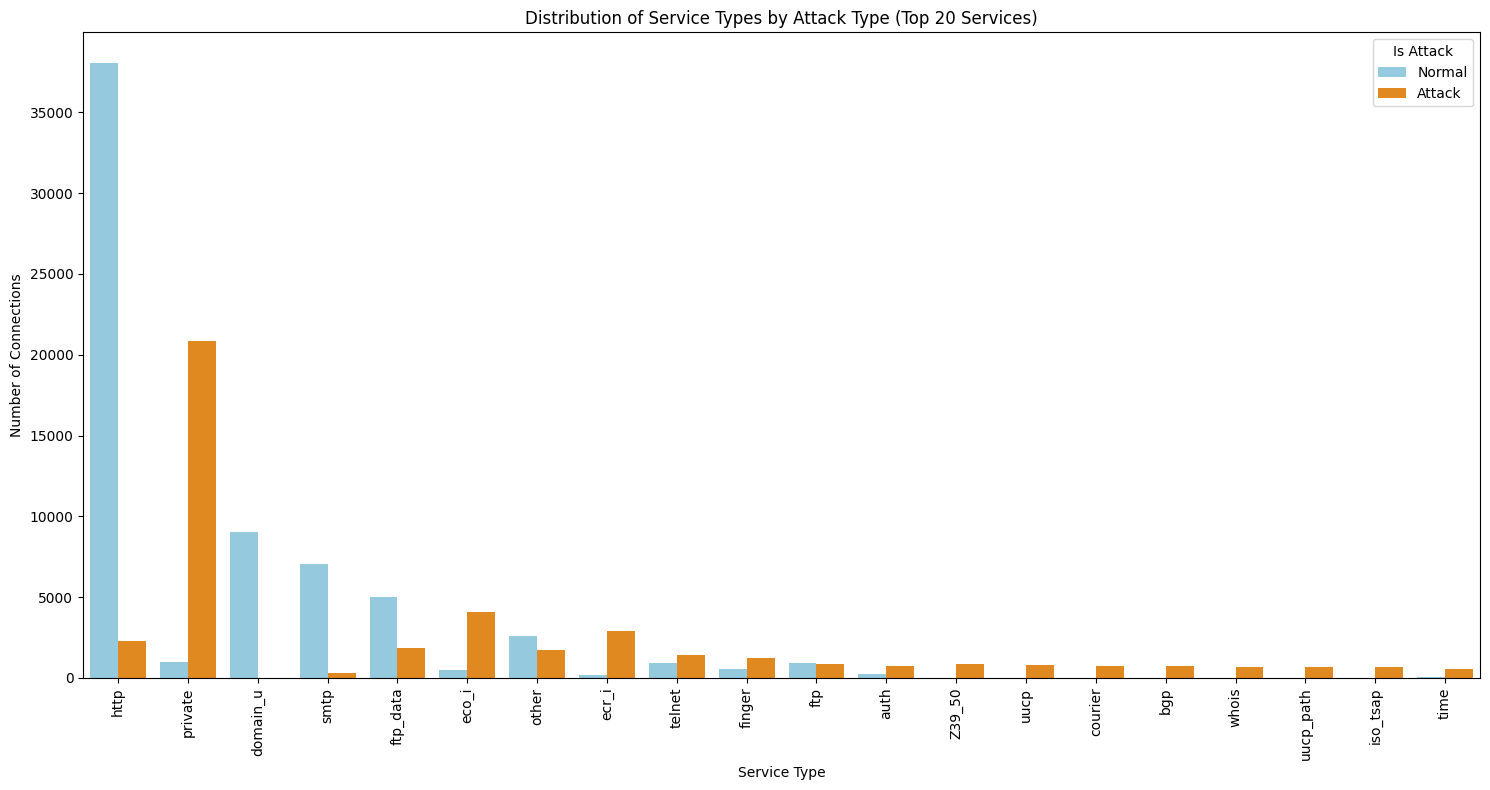

In [241]:
#Compare normal vs attack with services
plt.figure(figsize=(15, 8))
# Get top N services for better readability if there are too many unique services
top_n_services = df_train['service'].value_counts().nlargest(20).index
sns.countplot(x="service", hue="is_attack", data=df_train[df_train['service'].isin(top_n_services)], palette=attack_palette, order=top_n_services)
plt.title("Distribution of Service Types by Attack Type (Top 20 Services)")
plt.xlabel("Service Type")
plt.ylabel("Number of Connections")
plt.xticks(rotation=90)
plt.legend(title="Is Attack", labels=["Normal", "Attack"])
plt.tight_layout()
plt.show() 

#we can see that private attacks is most common service 

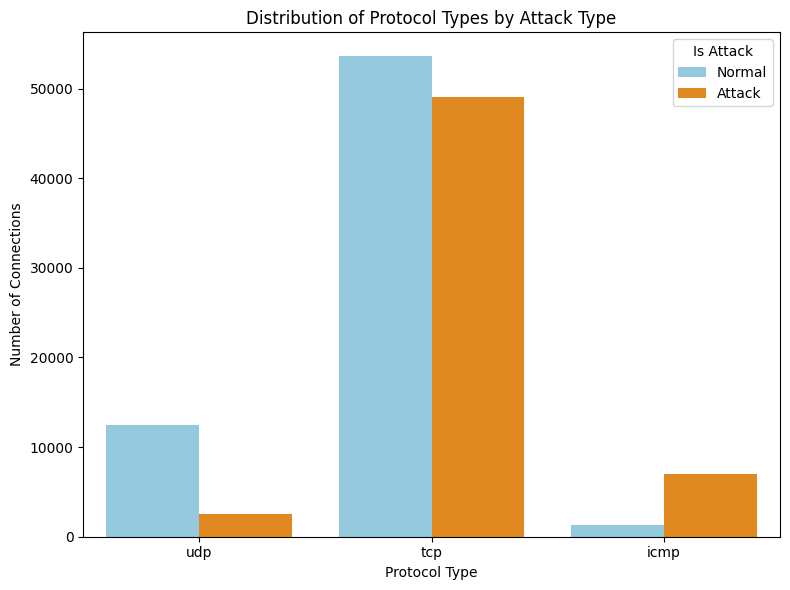

In [242]:
# Compare normal vs attack with protocol
plt.figure(figsize=(8, 6))
sns.countplot(x="protocol_type", hue="is_attack", data=df_train, palette=attack_palette)
plt.title("Distribution of Protocol Types by Attack Type")
plt.xlabel("Protocol Type")
plt.ylabel("Number of Connections")
plt.legend(title="Is Attack", labels=["Normal", "Attack"])
plt.tight_layout()
plt.show()

5. Data Preprocessing

5.1 Remove columns with zero Variance
 - as i mentined before, there is a column **num_outbound_cmds** whith zero variance 
 - i will do a small analysis to be sure, that the removal is eligible

In [243]:
print(f"--- Unique values in '{'num_outbound_cmds'}' ---")
print(df_train['num_outbound_cmds'].unique())

print(f"\n--- Value Counts for '{'num_outbound_cmds'}' ---")
print(df_train['num_outbound_cmds'].value_counts())

print(f"--- Variance of '{'num_outbound_cmds'}' ---")
print(f"Variance: {df_train['num_outbound_cmds'].var()}")

variances = df_train[numerical_features].var()


print("--- Features with Zero Variance ---")
zero_variance_features = variances[variances == 0].index.tolist()

if zero_variance_features:
    print(f"The following numerical features have zero variance: {zero_variance_features}")

else:
    print("No numerical features found with zero variance.")

--- Unique values in 'num_outbound_cmds' ---
[0]

--- Value Counts for 'num_outbound_cmds' ---
num_outbound_cmds
0    125972
Name: count, dtype: int64
--- Variance of 'num_outbound_cmds' ---
Variance: 0.0
--- Features with Zero Variance ---
The following numerical features have zero variance: ['num_outbound_cmds']


In [244]:
#drop zero variance features
df_train.drop("num_outbound_cmds", axis=1, inplace=True)
print("Dropped 'num_outbound_cmds' column.")
df_train.head() 

df_test.drop("num_outbound_cmds", axis=1, inplace=True)
print("Dropped 'num_outbound_cmds' column.")
df_test.head()

Dropped 'num_outbound_cmds' column.
Dropped 'num_outbound_cmds' column.


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,is_attack
0,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,0
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,1
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,1
4,0,tcp,http,SF,267,14515,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,0


- **Conclusion**: The column has zero Variance so i will remove it. Furthermore there are no other column with zero variance.

5.2 Seperate Features and Target
 - Algorithms learn to map input X (features) to output y (target). They need to know which data is the input they analyze and which is the outcome they predict.

In [245]:
# Separate features (X) and target (y)
X_train_raw = df_train.drop('is_attack', axis=1)
y_train = df_train['is_attack']

X_test_raw = df_test.drop('is_attack', axis=1)  
y_test = df_test['is_attack']   

5.2 Apply One-Hot Encoding for Categorical Features
 -  Why? 
 -  Explanation: Machine learning algorithms require numerical input. Categorical features like protocol_type ('tcp', 'udp', 'icmp') are nominal, meaning they have no inherent order. Using simple label encoding (e.g., 0, 1, 2) would incorrectly imply an ordinal relationship. One-Hot Encoding creates new binary (0/1) columns for each category, preventing this issue and allowing algorithms like Logistic Regression, SVM, and ANNs to interpret the data correctly.

In [246]:
# Identify categorical and numerical features
categorical_features = X_train_raw.select_dtypes(
    include=["object"]
).columns.tolist()
numerical_features = X_train_raw.select_dtypes(
    include=np.number
).columns.tolist()

print(f"Categorical features: {categorical_features}")
print(f"Numerical features: {numerical_features}")

Categorical features: ['protocol_type', 'service', 'flag']
Numerical features: ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


- Explanation: Many algorithms are sensitive to the scale of input features.
  - Distance-based algorithms (KNN, SVM): Features with larger ranges (e.g., src_bytes) can dominate the distance calculation, leading to biased models.
  - Gradient-based algorithms (Logistic Regression, ANN): Standardization (or scaling in general) helps the gradient descent algorithm converge faster and more reliably.
  - I will use **StandardScaler** to transform our numerical data to have a mean of 0 and a standard deviation of 1. I combine both preprocessing steps using **ColumnTransformer** for a clean and robust workflow.

In [247]:
# Create a preprocessor using ColumnTransformer
# It applies OneHotEncoder to categorical features and StandardScaler to numerical features.
# 'remainder='passthrough' ensures that any columns not specified are kept in the output.
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        (
            "cat",
            OneHotEncoder(handle_unknown="ignore"),
            categorical_features,
        ),
    ],
    remainder="passthrough",
)


In [248]:
# Test to see if data is transformed correctly
X_train_transformed = preprocessor.fit_transform(X_train_raw)
print(
    f"Original columns (X_train_raw): {X_train_raw.shape[1]}"
)  # Number of columns
print(f"Transformed columns: {X_train_transformed.shape[1]}")

print("Statistical key figures of the numerical features BEFORE scaling ")
print(X_train_raw[numerical_features].describe().loc[['mean', 'std']])
print("\n" + "="*70 + "\n")


num_numerical_cols = len(numerical_features)
scaled_numerical_data = X_train_transformed[:, :num_numerical_cols]

scaled_numerical_df = pd.DataFrame(scaled_numerical_data, columns=numerical_features)

print("Statistical key figures of the numerical features AFTER scaling (by preprocessor)")
print(scaled_numerical_df.describe().loc[['mean', 'std']])

Original columns (X_train_raw): 40
Transformed columns: 121
Statistical key figures of the numerical features BEFORE scaling 
         duration     src_bytes     dst_bytes      land  wrong_fragment  \
mean   287.146929  4.556710e+04  1.977927e+04  0.000198        0.022688   
std   2604.525522  5.870354e+06  4.021285e+06  0.014086        0.253531   

        urgent       hot  num_failed_logins  logged_in  num_compromised  ...  \
mean  0.000111  0.204411           0.001222   0.395739         0.279253  ...   
std   0.014366  2.149977           0.045239   0.489011        23.942137  ...   

      dst_host_count  dst_host_srv_count  dst_host_same_srv_rate  \
mean      182.149200          115.653725                0.521244   
std        99.206565          110.702886                0.448950   

      dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
mean                0.082952                     0.148379   
std                 0.188922                     0.308998   

      dst_host_srv

5.3 Principal Component Analysis (PCA)

In [249]:
#from sklearn.decomposition import PCA

#We choose to keep 95% of the variance. This is a common and effective strategy.
# PCA will automatically determine how many components are needed.
#pca = PCA(n_components=0.95)

# Fit and transform the training data
#X_train_pca = pca.fit_transform(X_train_processed)

# Use the same fitted PCA to transform the test data
#X_test_pca = pca.transform(X_test_processed)

#print("Original number of features:", X_train_processed.shape[1])
#print("Number of features after PCA:", X_train_pca.shape[1])

6. Model Training (Traditional ML Models)
 - Models: I use **sklearn.pipeline.Pipeline** to chain our preprocessor with each model, ensuring that the same preprocessing is applied consistently during training and testing.
   - Logistic Regression
   - SVM
   - Random Forest
   - Decision Tree
   - KNN

6.1 Logistc Regression

In [250]:
# Create a pipeline with preprocessor and Logistic Regression
lr_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        (
            "classifier",
            LogisticRegression(max_iter=1000, random_state=42),
        ),
    ]
)

lr_pipeline.fit(X_train_raw, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


6.2 Support Vector Machine (SVM)

In [251]:

# Create a pipeline with preprocessor and SVM
svm_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", SVC(probability=True, random_state=42)),
    ]
)

svm_pipeline.fit(X_train_raw, y_train)


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


6.3 Decision Tree

In [252]:
# Create a pipeline with preprocessor and Decision Tree
dt_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", DecisionTreeClassifier(random_state=42)),
    ]
)

dt_pipeline.fit(X_train_raw, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


C:\Users\marce\AppData\Local\Temp\ipykernel_46000\3126451414.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances.head(top_n).values, y=sorted_importances.head(top_n).index, palette='viridis')


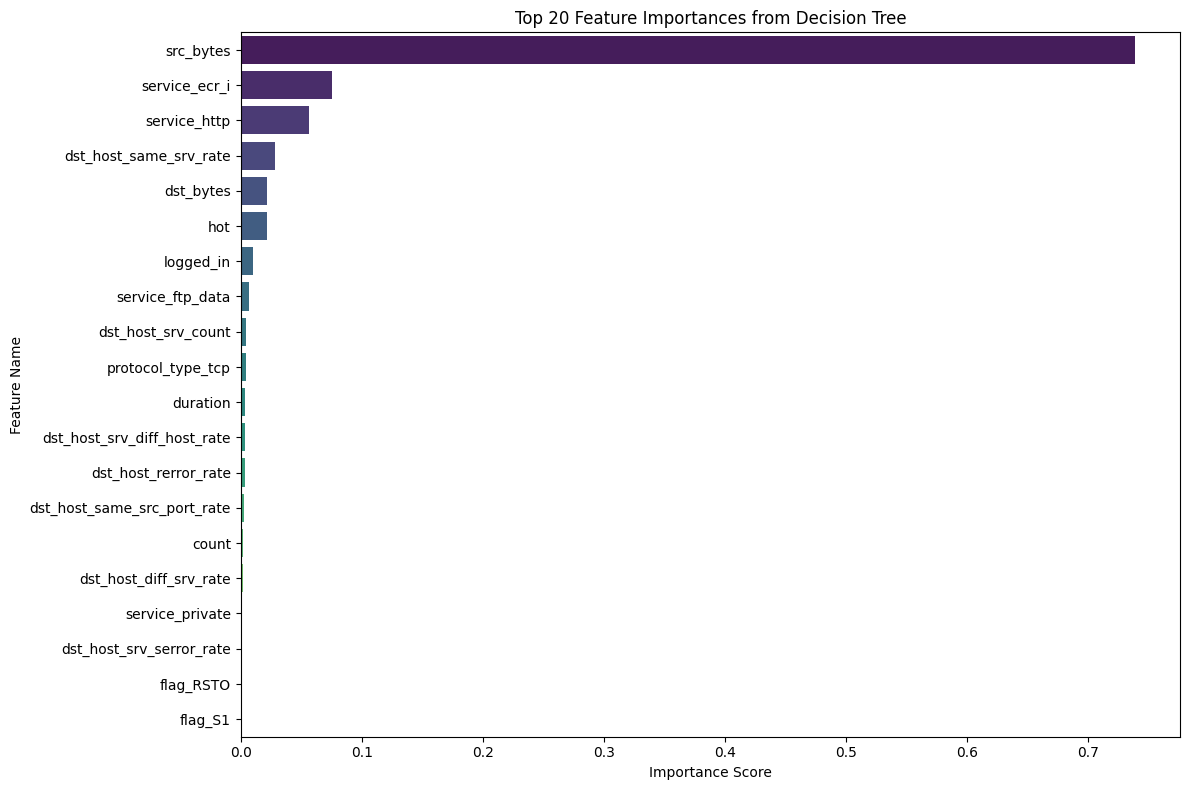


Top 10 Feature Importances (Decision Tree):
src_bytes                 0.739209
service_ecr_i             0.075375
service_http              0.056484
dst_host_same_srv_rate    0.028522
dst_bytes                 0.022160
hot                       0.021540
logged_in                 0.010256
service_ftp_data          0.007153
dst_host_srv_count        0.004498
protocol_type_tcp         0.004393
dtype: float64


In [253]:
dt_classifier = dt_pipeline.named_steps['classifier']

# Get the feature names after preprocessing
# The preprocessor is fitted on X_train_raw, so we can use it to get the column names
# Get one-hot encoded feature names
one_hot_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
# Combine numerical and one-hot encoded feature names
all_feature_names = numerical_features + list(one_hot_features)

# Get feature importances from the trained Decision Tree classifier
importances = dt_classifier.feature_importances_

# Create a pandas Series for easy viewing and sorting
feature_importances = pd.Series(importances, index=all_feature_names)

# Sort the features by importance in descending order
sorted_importances = feature_importances.sort_values(ascending=False)

# Plot the top N most important features
plt.figure(figsize=(12, 8))
top_n = 20 # You can adjust this number to show more or fewer features
sns.barplot(x=sorted_importances.head(top_n).values, y=sorted_importances.head(top_n).index, palette='viridis')
plt.title(f"Top {top_n} Feature Importances from Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()

print("\nTop 10 Feature Importances (Decision Tree):")
print(sorted_importances.head(10))

6.4 Random Forest

In [254]:
# Create a pipeline with preprocessor and Random Forest
rf_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", RandomForestClassifier(random_state=42)),
    ]
)

rf_pipeline.fit(X_train_raw, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


6.5 K-Nearest Neighbors (KNN)

In [255]:
# Create a pipeline with preprocessor and KNN
knn_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", KNeighborsClassifier()),
    ]
)

knn_pipeline.fit(X_train_raw, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


7. Model Training ANN


7.1 Sweep Optimization ANN

In [256]:

'''
# Define the training function that W&B will call
# Preprocess the data first for the ANN
X_train_processed = preprocessor.fit_transform(X_train_raw)
X_test_processed = preprocessor.transform(X_test_raw)


def train_sweep():
    # Initialize a new W&B run and get the config
    with wandb.init() as run:
        config = wandb.config

        # Build the ANN model using hyperparameters from the sweep config
        model = Sequential()
        model.add(Dense(
            config.hidden_layer_1_size,
            input_shape=(X_train_processed.shape[1],),
            activation=config.activation,
        ))
        model.add(Dropout(config.dropout_rate))
        model.add(Dense(
            config.hidden_layer_2_size,
            activation=config.activation
        ))
        model.add(Dropout(config.dropout_rate))
        model.add(Dense(1, activation="sigmoid"))

        # Select optimizer and set learning rate from the config
        if config.optimizer == "adam":
            optimizer = Adam(learning_rate=config.learning_rate)
        elif config.optimizer == "rmsprop":
            optimizer = RMSprop(learning_rate=config.learning_rate)
        else:
            optimizer = SGD(learning_rate=config.learning_rate)

        # Compile the model
        model.compile(
            optimizer=optimizer,
            loss="binary_crossentropy",
            metrics=["accuracy"],
        )

        # Train the model
        model.fit(
            X_train_processed,
            y_train,
            epochs=config.epochs,
            batch_size=config.batch_size,
            # Use the pre-processed test set for validation
            validation_data=(X_test_processed, y_test),
            # Add the W&B callback to automatically log metrics
            callbacks=[WandbMetricsLogger(log_freq="epoch")],
            verbose=0, # Set to 0 to keep notebook output clean during sweep
        )
'''

'\n# Define the training function that W&B will call\n# Preprocess the data first for the ANN\nX_train_processed = preprocessor.fit_transform(X_train_raw)\nX_test_processed = preprocessor.transform(X_test_raw)\n\n\ndef train_sweep():\n    # Initialize a new W&B run and get the config\n    with wandb.init() as run:\n        config = wandb.config\n\n        # Build the ANN model using hyperparameters from the sweep config\n        model = Sequential()\n        model.add(Dense(\n            config.hidden_layer_1_size,\n            input_shape=(X_train_processed.shape[1],),\n            activation=config.activation,\n        ))\n        model.add(Dropout(config.dropout_rate))\n        model.add(Dense(\n            config.hidden_layer_2_size,\n            activation=config.activation\n        ))\n        model.add(Dropout(config.dropout_rate))\n        model.add(Dense(1, activation="sigmoid"))\n\n        # Select optimizer and set learning rate from the config\n        if config.optimizer =

In [257]:
'''
sweep_config = {
    "method": "bayes",  # Use Bayesian optimization
    "metric": {"name": "val_accuracy", "goal": "maximize"},
    "parameters": {
        "epochs": {
            "distribution": "categorical",  
            "values": [10, 20, 30, 40],  
        },
        "batch_size": {
            "distribution": "categorical",
            "values": [32, 64, 128],
        },
        "learning_rate": {
            "distribution": "log_uniform_values",
            "min": 0.00001,
            "max": 0.01,
        },
        "optimizer": {
            "distribution": "categorical",
            "values": ["adam", "rmsprop", "sgd"],
        },
        "hidden_layer_1_size": {
            "distribution": "categorical",
            "values": [32, 64, 128],
        },
        "hidden_layer_2_size": {
            "distribution": "categorical",
            "values": [16, 32, 64],
        },
        "activation": {
            "distribution": "categorical",
            "values": ["relu", "tanh"],
        },
        "dropout_rate": {
            "distribution": "uniform",
            "min": 0.1,
            "max": 0.5,
        },
    },
}
'''

'\nsweep_config = {\n    "method": "bayes",  # Use Bayesian optimization\n    "metric": {"name": "val_accuracy", "goal": "maximize"},\n    "parameters": {\n        "epochs": {\n            "distribution": "categorical",  \n            "values": [10, 20, 30, 40],  \n        },\n        "batch_size": {\n            "distribution": "categorical",\n            "values": [32, 64, 128],\n        },\n        "learning_rate": {\n            "distribution": "log_uniform_values",\n            "min": 0.00001,\n            "max": 0.01,\n        },\n        "optimizer": {\n            "distribution": "categorical",\n            "values": ["adam", "rmsprop", "sgd"],\n        },\n        "hidden_layer_1_size": {\n            "distribution": "categorical",\n            "values": [32, 64, 128],\n        },\n        "hidden_layer_2_size": {\n            "distribution": "categorical",\n            "values": [16, 32, 64],\n        },\n        "activation": {\n            "distribution": "categorical",\n  

In [258]:

'''
# 1. Initialize the sweep
sweep_id = wandb.sweep(sweep_config, project="nsl-kdd-ann-sweep")

# 2. Run the agent
# This will call the 'train_sweep' function 'count' times.
# Let's run it 20 times as an example.
wandb.agent(sweep_id, function=train_sweep, count=100)

# 3. (Optional) Finish the W&B run in the notebook
wandb.finish()
'''


'\n# 1. Initialize the sweep\nsweep_id = wandb.sweep(sweep_config, project="nsl-kdd-ann-sweep")\n\n# 2. Run the agent\n# This will call the \'train_sweep\' function \'count\' times.\n# Let\'s run it 20 times as an example.\nwandb.agent(sweep_id, function=train_sweep, count=100)\n\n# 3. (Optional) Finish the W&B run in the notebook\nwandb.finish()\n'

7.2 Sweep Optimization Training ANN

In [269]:

# Preprocess the data first for the ANN
X_train_processed = preprocessor.fit_transform(X_train_raw)
X_test_processed = preprocessor.transform(X_test_raw)

# --- Hyperparameter from the best Sweep ---
activation_func = 'relu'
batch_size = 32
dropout_rate = 0.13108215646498325
epochs = 18
hidden_layer_1_size = 32
hidden_layer_2_size = 32
learning_rate = 0.0005209989611938405
optimizer_name = 'adam'

# Build the ANN model
ann_model = Sequential(
    [
        # First Hidden Layer: size from sweep (32), 'relu' activation
        Dense(hidden_layer_1_size, activation=activation_func,
              input_shape=(X_train_processed.shape[1],)),
        # Second Hidden Layer: size from sweep (32), 'relu' activation
        Dense(hidden_layer_2_size, activation=activation_func),
        # Dropout Layer added with rate from the sweep
        Dropout(dropout_rate),
        # Output Layer
        Dense(1, activation="sigmoid"),
    ]
)

print("\nANN Model Summary:")
ann_model.summary()
print("-" * 30)

# Compile the model
ann_model.compile(
    optimizer=optimizer_name,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("Training ANN model...")
history = ann_model.fit(
    X_train_processed,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    verbose=1,
    validation_split=0.2,  # Use 20% of training data for validation
)
print("ANN model training complete.")




ANN Model Summary:


C:\Users\marce\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 32)             │         3,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,993 (19.50 KB)

 Trainable params: 4,993 (19.50 KB)

 Non-trainable params: 0 (0.00 B)

------------------------------
Training ANN model...
Epoch 1/18
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 3s 721us/step - accuracy: 0.9617 - loss: 0.1079 - val_accuracy: 0.9923 - val_loss: 0.0229
Epoch 2/18
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 2s 665us/step - accuracy: 0.9915 - loss: 0.0247 - val_accuracy: 0.9925 - val_loss: 0.0215
Epoch 3/18
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 2s 654us/step - accuracy: 0.9930 - loss: 0.0197 - val_accuracy: 0.9944 - val_loss: 0.0183
Epoch 4/18
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 2s 698us/step - accuracy: 0.9936 - loss: 0.0176 - val_accuracy: 0.9951 - val_loss: 0.0162
Epoch 5/18
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 2s 668us/step - accuracy: 0.9946 - loss: 0.0151 - val_accuracy: 0.9940 - val_loss: 0.0143
Epoch 6/18
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 2s 681us/step - accuracy: 0.9953 - loss: 0.0137 - val_accuracy: 0.9938 - val_loss: 0.0149
Epoch 7/18
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 2s 750us/step - accuracy: 0.9952 - loss: 0.0137 - val_accuracy: 0.9951 - val_loss: 0.0179
Epoch 8/18
3150/3150 ━━

8. Model Evaluation & Comparison

In [265]:
# A dictionary to store all trained models for easy evaluation
models = {
    "Logistic Regression": lr_pipeline,
    "SVM": svm_pipeline,
    "Decision Tree": dt_pipeline,
    "Random Forest": rf_pipeline,
    "KNN": knn_pipeline,
}


#Define the Evaluation Function with Plotting
# A dictionary to store the performance metrics of each model
results = {}

def evaluate_model(model, X_test_data, y_test_data, model_name):
    """
    Evaluates a trained model, prints key metrics, and plots the
    Confusion Matrix and ROC Curve.
    """
    # Handle predictions differently for ANN vs. scikit-learn models
    if model_name == "ANN":
        # Ensure model.predict returns probabilities, and convert to binary
        y_pred_proba = model.predict(X_test_data).flatten()
        y_pred = (y_pred_proba > 0.5).astype(int)
        # For ROC curve, we need the probability of the positive class
        y_pred_proba_positive = y_pred_proba
    else:
        y_pred = model.predict(X_test_data)
        # For ROC curve, we need the probability of the positive class (class 1)
        y_pred_proba_positive = model.predict_proba(X_test_data)[:, 1]

    # Calculate performance metrics
    acc = accuracy_score(y_test_data, y_pred)
    prec = precision_score(y_test_data, y_pred)
    rec = recall_score(y_test_data, y_pred)
    f1 = f1_score(y_test_data, y_pred)
    roc_auc = roc_auc_score(y_test_data, y_pred_proba_positive)

    # Print the metrics
    print(f"\n--- {model_name} Evaluation ---")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC: {roc_auc:.4f}")

    # Plot Confusion Matrix and ROC Curve side-by-side
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f"Evaluation Plots for {model_name}", fontsize=16)

    # Plot Confusion Matrix
    ConfusionMatrixDisplay.from_predictions(
        y_test_data, y_pred, cmap="Blues", ax=axes[0]
    )
    axes[0].set_title("Confusion Matrix")

    # Plot ROC Curve
    RocCurveDisplay.from_predictions(
        y_test_data, y_pred_proba_positive, ax=axes[1]
    )
    axes[1].set_title("ROC Curve")
    plt.show()

    # Return a dictionary of the metrics for later comparison
    return {
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1_score": f1,
        "auc": roc_auc,
    }

In [266]:
def plot_ann_training_history(history):
    """
    Plots the training and validation loss, accuracy, precision, and recall
    from the Keras History object.
    """
    epochs = range(1, len(history.history["loss"]) + 1)

    plt.figure(figsize=(15, 10))

    # Plot Loss
    plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st plot
    plt.plot(epochs, history.history["loss"], label="Training Loss")
    if "val_loss" in history.history:
        plt.plot(epochs, history.history["val_loss"], label="Validation Loss")
    plt.title("ANN Training & Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)

    # Plot Accuracy
    plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd plot
    plt.plot(epochs, history.history["accuracy"], label="Training Accuracy")
    if "val_accuracy" in history.history:
        plt.plot(
            epochs, history.history["val_accuracy"], label="Validation Accuracy"
        )
    plt.title("ANN Training & Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)


    plt.tight_layout()  # Adjusts subplot parameters for a tight layout
    plt.show()


--- Logistic Regression Evaluation ---
Accuracy: 0.7536
Precision: 0.9174
Recall: 0.6232
F1-Score: 0.7422
AUC: 0.7915


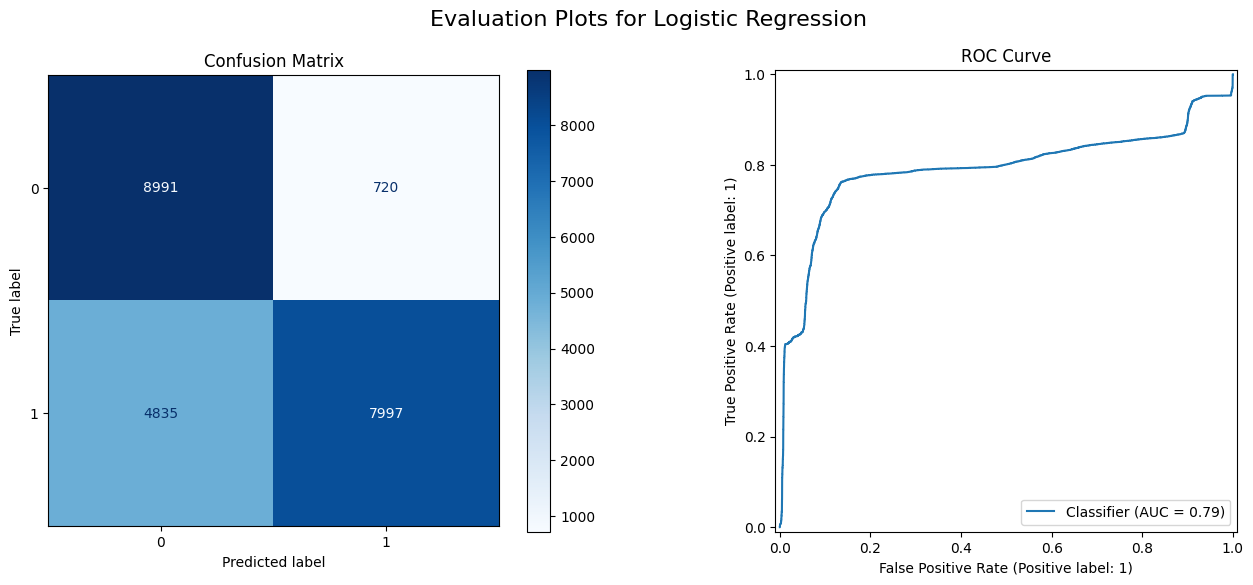


--- SVM Evaluation ---
Accuracy: 0.7721
Precision: 0.9629
Recall: 0.6236
F1-Score: 0.7570
AUC: 0.8886


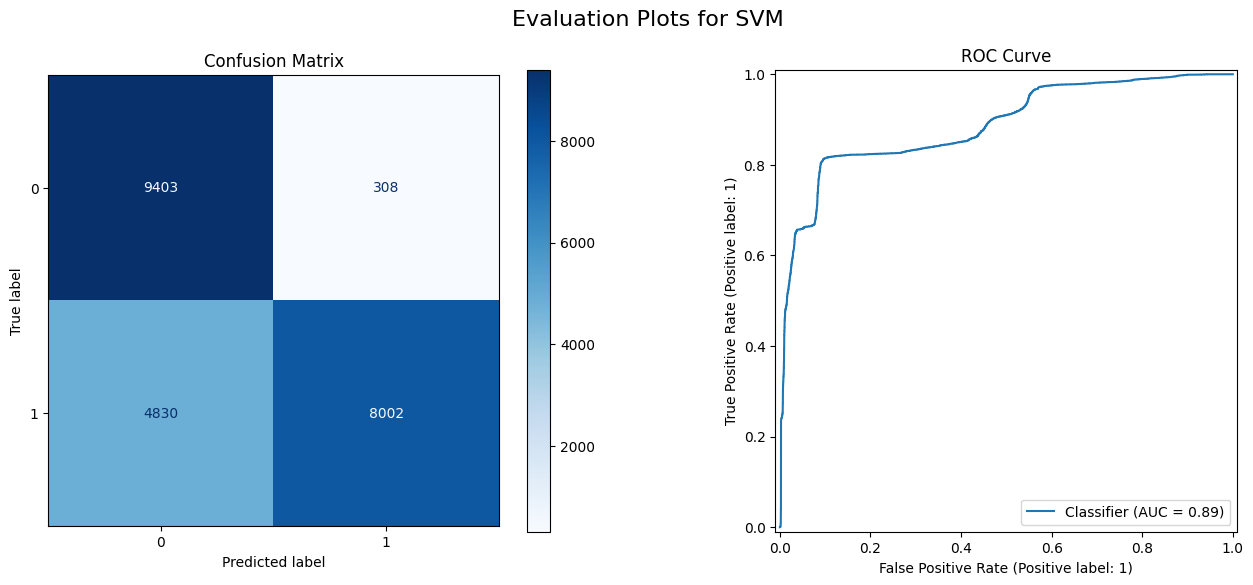


--- Decision Tree Evaluation ---
Accuracy: 0.8115
Precision: 0.9665
Recall: 0.6929
F1-Score: 0.8071
AUC: 0.8308


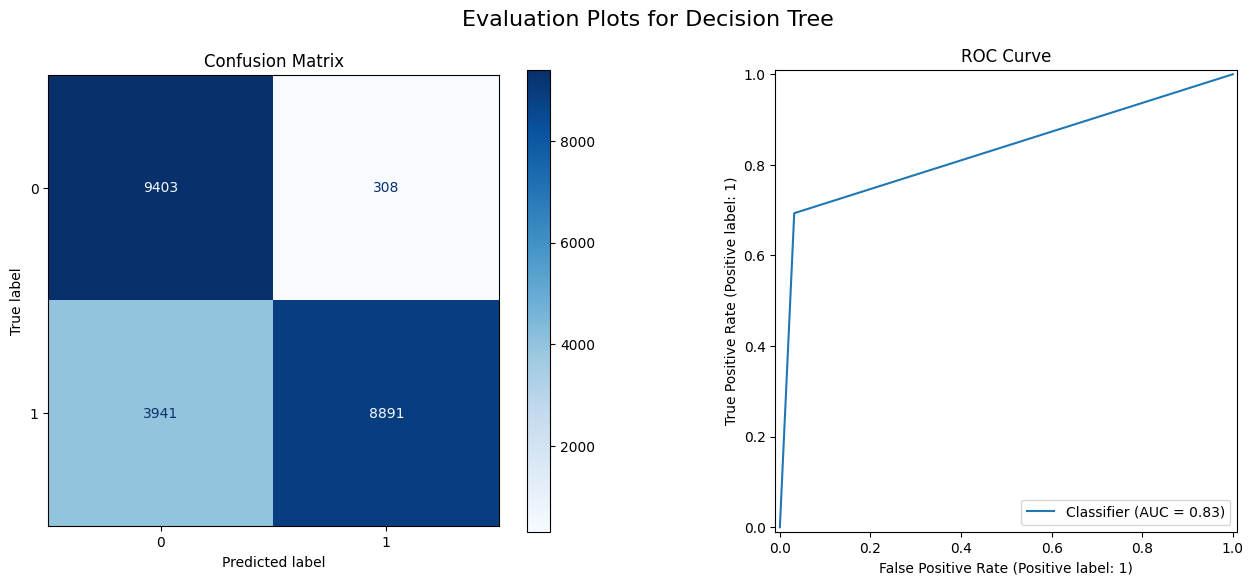


--- Random Forest Evaluation ---
Accuracy: 0.7650
Precision: 0.9675
Recall: 0.6076
F1-Score: 0.7464
AUC: 0.9593


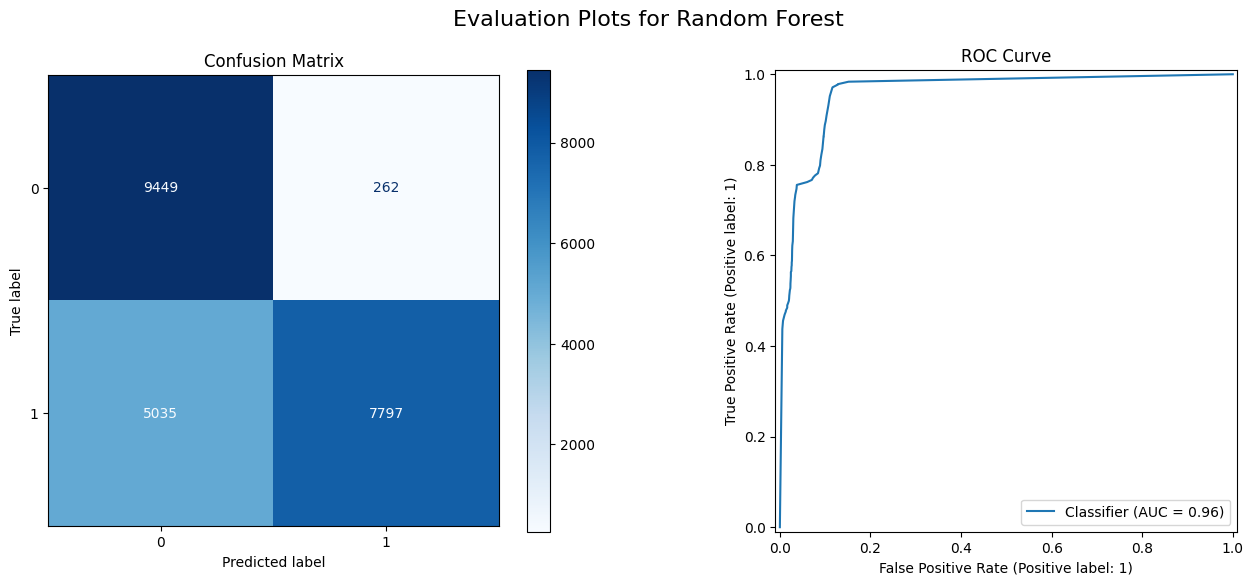


--- KNN Evaluation ---
Accuracy: 0.7802
Precision: 0.9679
Recall: 0.6350
F1-Score: 0.7669
AUC: 0.8274


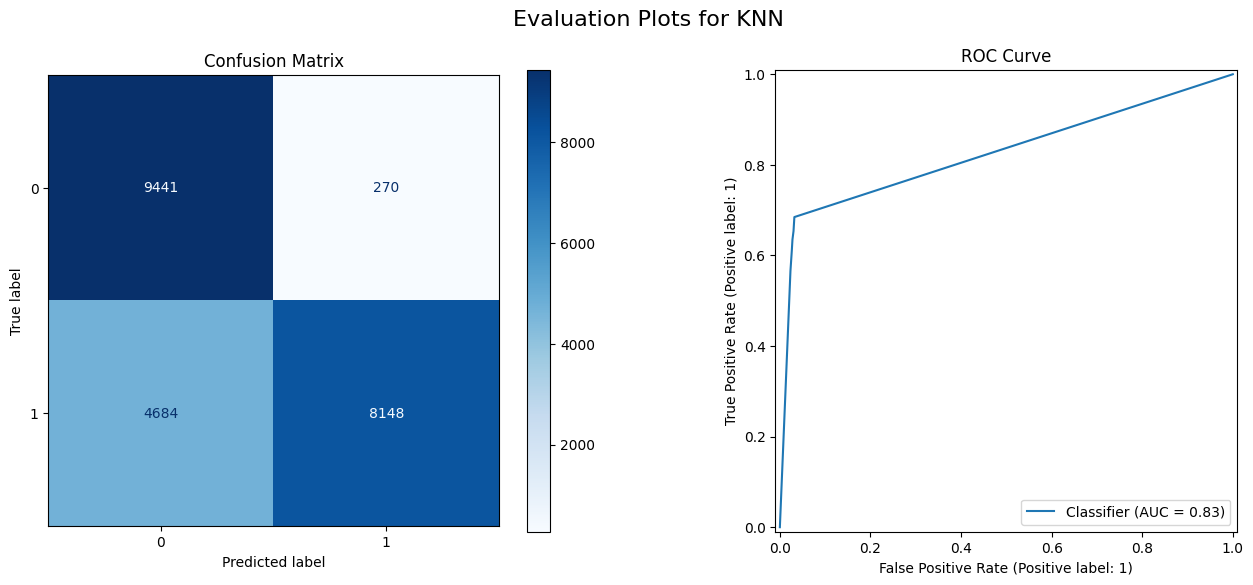

705/705 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step

--- ANN Evaluation ---
Accuracy: 0.7946
Precision: 0.9269
Recall: 0.6939
F1-Score: 0.7937
AUC: 0.8875


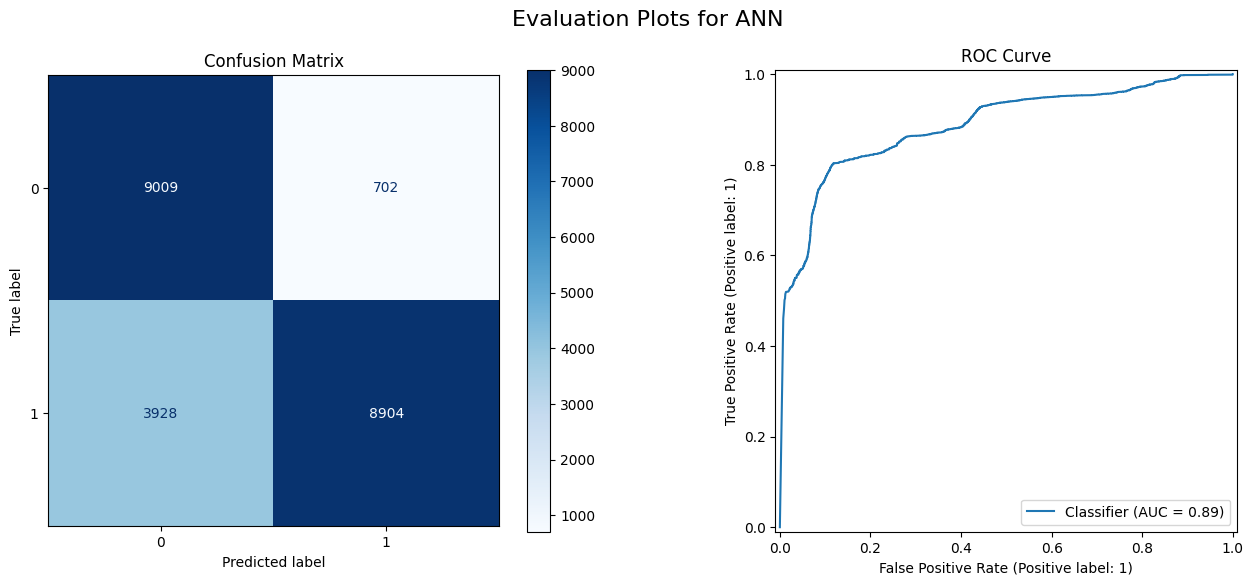

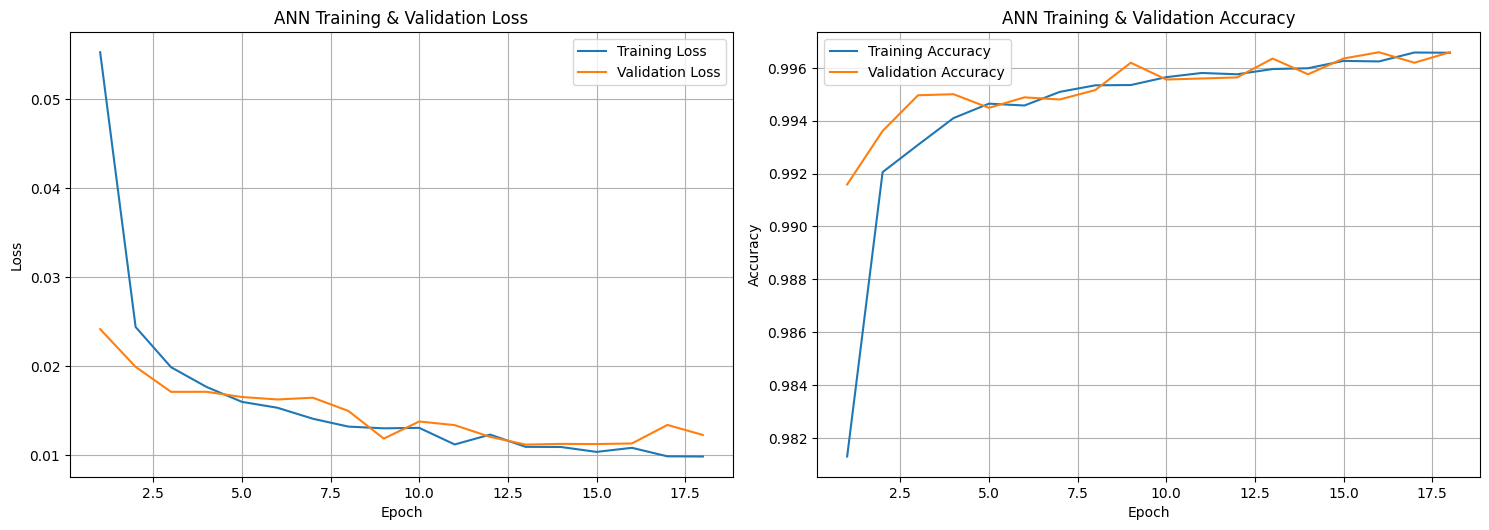

In [267]:
for model_name, model in models.items():
    if model is not None:  # Check if model is actually defined (not None placeholder)
        model_results = evaluate_model(model, X_test_raw, y_test, model_name)
        results[model_name] = model_results
    else:
        print(f"Skipping {model_name}: Model not defined.")


# Evaluate the ANN model separately, as it requires the preprocessed test data
ann_results = evaluate_model(ann_model, X_test_processed, y_test, "ANN")
results["ANN"] = ann_results

# --- Plot the ANN Loss, Accuracy
plot_ann_training_history(history)

### Key Findings from ANN Training & Validation Plots

These plots illustrate the learning process and performance of your Artificial Neural Network over 50 training epochs.

**Left Plot: ANN Training & Validation Loss**
*   **X-axis:** Represents the **Epoch**, which is one complete pass through the entire training dataset. The plot shows 50 epochs.
*   **Y-axis:** Represents the **Loss** (specifically, binary cross-entropy loss), which is a measure of how well the model is performing. Lower loss indicates a better fit to the data.

In [268]:
# Display Final Comparative Results ---

print("\n" + "=" * 50)
print("      Final Comparative Summary of All Models")
print("=" * 50)

# Convert the results dictionary to a pandas DataFrame for a clean, tabular view
results_df = pd.DataFrame.from_dict(results, orient="index")

# Display the DataFrame, sorted by F1-Score for easy comparison
print(results_df.sort_values(by="f1_score", ascending=False).round(4))


      Final Comparative Summary of All Models
                     accuracy  precision  recall  f1_score     auc
Decision Tree          0.8115     0.9665  0.6929    0.8071  0.8308
ANN                    0.7946     0.9269  0.6939    0.7937  0.8875
KNN                    0.7802     0.9679  0.6350    0.7669  0.8274
SVM                    0.7721     0.9629  0.6236    0.7570  0.8886
Random Forest          0.7650     0.9675  0.6076    0.7464  0.9593
Logistic Regression    0.7536     0.9174  0.6232    0.7422  0.7915
